In [1]:
import json
import glob
import os

filepath = 'all.streamingblock.json'

with open(filepath,'r') as f: 
      j=json.load(f) 

In [17]:
from pprint import pprint
data=j['Data']['RootChunk']['descriptors']
print('Sectors found - ',len(data))
#pprint(data[0])    

#data[0]['streamingBox']['Min']['X']

Sectors found -  22761


In [3]:
#Enter the player location below (obtain from AMM)
player_loc={'X':-908,'Y':1861,'Z':43}


In [4]:
player_in_int=[]
player_in_ext=[]
player_in_quest=[]

for sector in data:
    if sector['streamingBox']['Min']['X']<player_loc['X'] and sector['streamingBox']['Max']['X']>player_loc['X']:
        if sector['streamingBox']['Min']['Y']<player_loc['Y'] and sector['streamingBox']['Max']['Y']>player_loc['Y']:
            if sector['streamingBox']['Min']['Z']<player_loc['Z'] and sector['streamingBox']['Max']['Z']>player_loc['Z']:
                if sector['category']=='Exterior':
                    player_in_ext.append(sector)
                if sector['category']=='Interior':
                    player_in_int.append(sector)                
                if sector['category']=='Quest':
                    player_in_quest.append(sector)
print('Interior ',len(player_in_int))
print('Exterior ',len(player_in_ext))
print('Quest ',len(player_in_quest))

Interior  22
Exterior  173
Quest  2266


In [18]:
for sect in player_in_int:
    print(sect['data']['DepotPath'].split('\\')[-1])


interior_-29_58_1_0.streamingsector
interior_-29_57_1_0.streamingsector
interior_-28_57_1_0.streamingsector
interior_-28_58_1_0.streamingsector
interior_-15_27_0_1.streamingsector
interior_-15_29_0_1.streamingsector
interior_-15_28_0_1.streamingsector
interior_-8_13_0_2.streamingsector
interior_-8_14_0_2.streamingsector
interior_-6_5_0_3.streamingsector
interior_-5_5_0_3.streamingsector
interior_-2_5_0_3.streamingsector
interior_-4_8_0_3.streamingsector
interior_-3_0_-1_4.streamingsector
interior_-3_3_-1_4.streamingsector
interior_-3_2_0_4.streamingsector
interior_-1_2_0_4.streamingsector
interior_-3_3_0_4.streamingsector
interior_-3_4_0_4.streamingsector
interior_-2_4_0_4.streamingsector
interior_-2_5_0_4.streamingsector
interior_-2_3_0_4.streamingsector


In [19]:
for sect in player_in_ext:
    print(sect['data']['DepotPath'].split('\\')[-1])

exterior_-17_27_0_0.streamingsector
exterior_-16_27_0_0.streamingsector
exterior_-14_27_0_0.streamingsector
exterior_-15_27_0_0.streamingsector
exterior_-17_30_0_0.streamingsector
exterior_-17_28_0_0.streamingsector
exterior_-17_29_1_0.streamingsector
exterior_-17_29_0_0.streamingsector
exterior_-13_29_0_0.streamingsector
exterior_-13_30_0_0.streamingsector
exterior_-15_28_0_0.streamingsector
exterior_-15_29_0_0.streamingsector
exterior_-16_28_0_0.streamingsector
exterior_-16_29_0_0.streamingsector
exterior_-14_30_0_0.streamingsector
exterior_-13_31_0_0.streamingsector
exterior_-13_30_1_0.streamingsector
exterior_-16_30_0_0.streamingsector
exterior_-15_30_0_0.streamingsector
exterior_-14_28_0_0.streamingsector
exterior_-13_28_0_0.streamingsector
exterior_-14_29_0_0.streamingsector
exterior_-13_29_1_0.streamingsector
exterior_-8_13_-1_1.streamingsector
exterior_-7_13_-1_1.streamingsector
exterior_-10_12_0_1.streamingsector
exterior_-9_13_0_1.streamingsector
exterior_-9_12_0_1.streamings

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == "__main__":


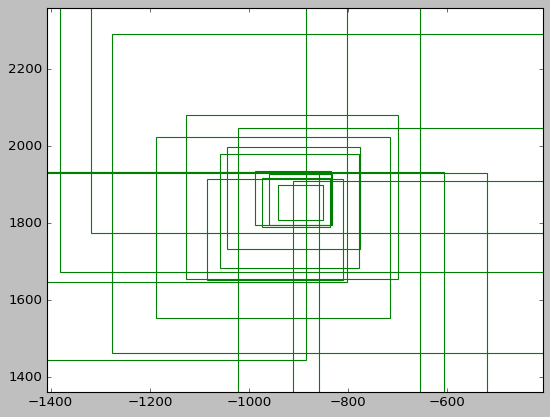

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
plt.style.use('classic')
%matplotlib inline
fig = plt.figure()
plt.xlim([player_loc['X']-500,player_loc['X']+500])
plt.ylim([player_loc['Y']-500,player_loc['Y']+500])
ax = fig.add_subplot(111)
for sect in player_in_int:
    if sector['level']==0:
        h=sect['streamingBox']['Max']['Y']-sect['streamingBox']['Min']['Y']
        w=sect['streamingBox']['Max']['X']-sect['streamingBox']['Min']['X']
        ax.add_patch( Rectangle((sect['streamingBox']['Min']['X'],sect['streamingBox']['Min']['Y']),
                            w, h,
                            fc ='none', 
                            ec ='g',
                            lw = 1) )
